In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/multiclass/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [5]:
mi = mutual_info_classif(X, y)
mi

array([0.45524092, 0.19062037, 0.12623703, 1.73536468, 0.28269728,
       0.12362467, 0.09132125, 0.13534866, 1.58203382, 0.77892678,
       0.7182304 , 0.22887545, 0.68720753, 0.67043368, 0.16457235,
       0.05049026, 0.17671334, 0.16523945, 0.18874196, 0.77823829,
       0.22177365, 1.76506123, 0.35285418, 0.36755859, 0.10116877,
       0.0261452 , 0.16719842, 0.13024316, 0.4641333 , 0.19027362,
       0.11524657, 0.5084459 , 0.13355316, 0.33681054, 0.07017293,
       0.03583808, 0.06063525, 0.05236299])

Text(0, 0.5, 'Mutual Information')

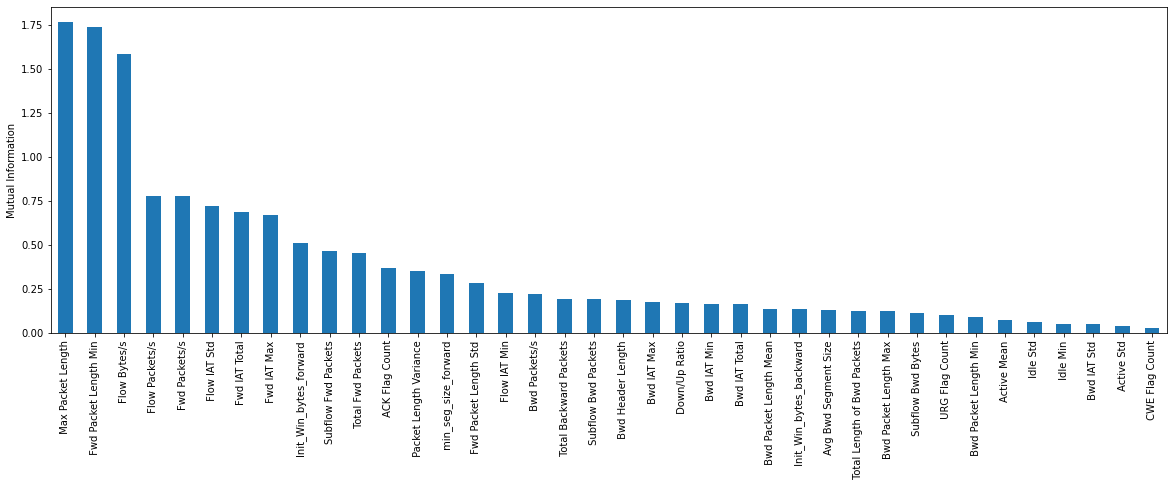

In [6]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [7]:
# here we will select the top 20 features
# based on their mutual information value

# select features
selector = SelectKBest(mutual_info_classif, k=20).fit(X, y)

# display features
X.columns[selector.get_support()]

Index([' Total Fwd Packets', ' Total Backward Packets',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Std', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Max', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Max Packet Length', ' Packet Length Variance', ' ACK Flag Count',
       'Subflow Fwd Packets', ' Subflow Bwd Packets', 'Init_Win_bytes_forward',
       ' min_seg_size_forward'],
      dtype='object')

In [8]:
# to remove the rest of the features:

X = selector.transform(X)

In [9]:
X.shape

(5280, 20)